# QuTiP example: Energy-levels of a quantum systems as a function of a single parameter

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import pi

In [3]:
from qutip import *

## Energy spectrum of three coupled qubits

In [4]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())
  
    idx = 0
    evals_mat = np.zeros((len(w1list),2*2*2))
    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx,:] = np.real(evals)

        idx += 1

    return evals_mat

In [5]:
w1  = 1.0 * 2 * pi   # atom 1 frequency: sweep this one
w2  = 0.9 * 2 * pi   # atom 2 frequency
w3  = 1.1 * 2 * pi   # atom 3 frequency
g12 = 0.05 * 2 * pi   # atom1-atom2 coupling strength
g13 = 0.05 * 2 * pi   # atom1-atom3 coupling strength

w1list = np.linspace(0.75, 1.25, 50) * 2 * pi # atom 1 frequency range

In [6]:
evals_mat = compute(w1list, w2, w3, g12, g13)

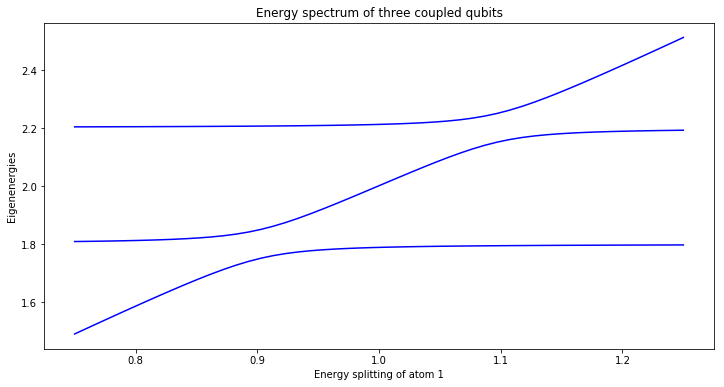

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

for n in [1,2,3]:
    ax.plot(w1list / (2*pi), (evals_mat[:,n]-evals_mat[:,0]) / (2*pi), 'b')

ax.set_xlabel('Energy splitting of atom 1')
ax.set_ylabel('Eigenenergies')
ax.set_title('Energy spectrum of three coupled qubits');

## Versions

In [8]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
